In [22]:
import torch
import torchvision

model = torchvision.models.alexnet(pretrained=True)
weights = torchvision.models.AlexNet_Weights.DEFAULT
# test model with small subset of imagenet data

device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")


/storage/vaibhav/a3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/storage/vaibhav/a3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [23]:
for p in model.parameters():
    print(p)

Parameter containing:
tensor([[[[ 1.1864e-01,  9.4069e-02,  9.5435e-02,  ...,  5.5822e-02,
            2.1575e-02,  4.9963e-02],
          [ 7.4882e-02,  3.8940e-02,  5.2979e-02,  ...,  2.5709e-02,
           -1.1299e-02,  4.1590e-03],
          [ 7.5425e-02,  3.8779e-02,  5.4930e-02,  ...,  4.3596e-02,
            1.0225e-02,  1.3251e-02],
          ...,
          [ 9.3155e-02,  1.0374e-01,  6.7547e-02,  ..., -2.0277e-01,
           -1.2839e-01, -1.1220e-01],
          [ 4.3544e-02,  6.4916e-02,  3.6164e-02,  ..., -2.0248e-01,
           -1.1376e-01, -1.0719e-01],
          [ 4.7369e-02,  6.2543e-02,  2.4758e-02,  ..., -1.1844e-01,
           -9.5567e-02, -8.3890e-02]],

         [[-7.2634e-02, -5.7996e-02, -8.0661e-02,  ..., -6.0304e-04,
           -2.5309e-02,  2.5471e-02],
          [-6.9042e-02, -6.7562e-02, -7.6367e-02,  ..., -3.9616e-03,
           -3.0402e-02,  1.0477e-02],
          [-9.9517e-02, -8.5592e-02, -1.0521e-01,  ..., -2.6587e-02,
           -2.2777e-02,  6.6451e-03]

In [24]:
# new model take input in [0,1]
from torchvision import transforms
class NormalizeModel(torch.nn.Module):
    def __init__(self, model):
        super(NormalizeModel, self).__init__()
        self.model = model

    def forward(self, x):
        x = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])(x)
        
        return self.model(x)
    
from enum import Enum
from torchvision import models
class ModelOptions(Enum):
    ALEXNET = models.alexnet
    RESNET18 = models.resnet18
    RESNET34 = models.resnet34
    RESNET50 = models.resnet50
    RESNET101 = models.resnet101
    RESNET152 = models.resnet152
    VGG11 = models.vgg11
    VGG13 = models.vgg13
    VGG16 = models.vgg16
    VGG19 = models.vgg19
    INCEPTION_V3 = models.inception_v3
    GOOGLENET = models.googlenet

from typing import Tuple
def get_model(model_option: ModelOptions)->Tuple[torch.nn.Module, transforms.Compose]:
    model = model_option(pretrained=True)
    model = NormalizeModel(model)
    transform=transforms.Compose([transforms.Resize((256,256),interpolation=transforms.InterpolationMode.BILINEAR),
                                                  transforms.CenterCrop(224),
                                                  transforms.ToTensor()])

    return model, transform

In [25]:
preprocess = weights.transforms()
print(preprocess.describe())

Accepts ``PIL.Image``, batched ``(B, C, H, W)`` and single ``(C, H, W)`` image ``torch.Tensor`` objects. The images are resized to ``resize_size=[256]`` using ``interpolation=InterpolationMode.BILINEAR``, followed by a central crop of ``crop_size=[224]``. Finally the values are first rescaled to ``[0.0, 1.0]`` and then normalized using ``mean=[0.485, 0.456, 0.406]`` and ``std=[0.229, 0.224, 0.225]``.


In [26]:
model, transform = get_model(ModelOptions.ALEXNET)

In [27]:
if torch.cuda.is_available():
    model.device = torch.device('cuda')

In [28]:
import json
class_idx = json.load(open("imagenet_class_index.json"))
print(class_idx)
idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]
cls2label = {class_idx[str(k)][0]: class_idx[str(k)][1] for k in range(len(class_idx))}



print(idx2label)

print(cls2label)



{'0': ['n01440764', 'tench'], '1': ['n01443537', 'goldfish'], '2': ['n01484850', 'great_white_shark'], '3': ['n01491361', 'tiger_shark'], '4': ['n01494475', 'hammerhead'], '5': ['n01496331', 'electric_ray'], '6': ['n01498041', 'stingray'], '7': ['n01514668', 'cock'], '8': ['n01514859', 'hen'], '9': ['n01518878', 'ostrich'], '10': ['n01530575', 'brambling'], '11': ['n01531178', 'goldfinch'], '12': ['n01532829', 'house_finch'], '13': ['n01534433', 'junco'], '14': ['n01537544', 'indigo_bunting'], '15': ['n01558993', 'robin'], '16': ['n01560419', 'bulbul'], '17': ['n01580077', 'jay'], '18': ['n01582220', 'magpie'], '19': ['n01592084', 'chickadee'], '20': ['n01601694', 'water_ouzel'], '21': ['n01608432', 'kite'], '22': ['n01614925', 'bald_eagle'], '23': ['n01616318', 'vulture'], '24': ['n01622779', 'great_grey_owl'], '25': ['n01629819', 'European_fire_salamander'], '26': ['n01630670', 'common_newt'], '27': ['n01631663', 'eft'], '28': ['n01632458', 'spotted_salamander'], '29': ['n01632777', 

In [29]:
# find index of a label
l = idx2label.index('tench')

In [30]:
ImageNetT2Labels=['tench', 'English_springer', 'cassette_player', 'chain_saw', 'church', 'French_horn', 'garbage_truck', 'gas_pump', 'golf_ball', 'parachute']

# convert ImageNetT2Labels to imagenet indexes

ImageNetT2ltoI={}
for l in ImageNetT2Labels:
    ImageNetT2ltoI[l]=idx2label.index(l)

In [31]:
print(ImageNetT2ltoI)

{'tench': 0, 'English_springer': 217, 'cassette_player': 482, 'chain_saw': 491, 'church': 497, 'French_horn': 566, 'garbage_truck': 569, 'gas_pump': 571, 'golf_ball': 574, 'parachute': 701}


In [32]:
print(model)

NormalizeModel(
  (model): AlexNet(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace=True)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace=True)
      (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): ReLU(inplace=True)
      (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
    (classifier): Sequential(
      (0): Dropout(p=0.5, inplace=False)
  

In [33]:
import os
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

class ImageNetT2Dataset(Dataset):
    def __init__(self, root_dir, transform=None, which_class:int|None=None):
        self.root_dir = root_dir
        # self.transform = preprocess
        self.transform = transform
        self.classes = sorted(os.listdir(root_dir))

        
        self.image_paths = []
        for i,class_name in enumerate(self.classes):
            if(which_class is not None and i!=which_class):
                continue
            class_dir = os.path.join(root_dir, class_name)
            for filename in os.listdir(class_dir):
                if filename.endswith('.JPEG'):
                    self.image_paths.append(os.path.join(class_dir, filename))

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')

        class_name = os.path.basename(os.path.dirname(img_path))
        # label = self.classes.index(class_name)
        label=cls2label[class_name]
        label=ImageNetT2ltoI[label]

        if self.transform:
            image = self.transform(image)
            

        return image, label ,img_path


# Specify the root directory of the dataset
root_dir = 'imagenette2'

# Split the dataset into training and validation sets
train_dir = os.path.join(root_dir, 'train')
val_dir = os.path.join(root_dir, 'val')

# transform = transforms.Compose([
#     transforms.Resize((256,256)),
#     transforms.CenterCrop(224),
#     transforms.ToTensor(),
# ])

# Create instances of the custom dataset for training and validation
train_dataset = ImageNetT2Dataset(train_dir,transform=transform)
val_dataset = ImageNetT2Dataset(val_dir,transform=transform)

# Create DataLoaders for training and validation datasets
batch_size = 100
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size,shuffle=True)




In [34]:
images_of_class1 = ImageNetT2Dataset(train_dir,transform=transform,which_class=1)
images_of_class2 = ImageNetT2Dataset(train_dir,transform=transform,which_class=2)


In [35]:


class1_dataloader = DataLoader(images_of_class1, batch_size=100, shuffle=True)
class2_dataloader = DataLoader(images_of_class2, batch_size=100, shuffle=True)


source_images=[]
non_source_images=[]


# return a list of image paths predicted as cls
def cls_predicted_images(cls,cls_dataloader,limit=100,):
    cls_images=[]

    if(torch.cuda.is_available()):
        model.to(device)

    with torch.no_grad():
        for i, (images, labels, paths) in enumerate(cls_dataloader):
            images = images.to(model.device)

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            for j in range(len(predicted)):
                if predicted[j]==cls:
                    cls_images.append(paths[j])
                    if len(cls_images)==limit:
                        return cls_images
    
    return cls_images

In [36]:
class1_images,_,_ = next(iter(class1_dataloader))
class2_images,_,_ = next(iter(class2_dataloader))

In [37]:
from ATTACK import AdversarialAttack

In [38]:
attack=AdversarialAttack(model,1)
attack.generate_perturbation(class1_images,class2_images)

In [ ]:
img,l = train_dataset.__getitem__(10)
print(img)
# print("shape:",img.shape)
# print("min and max val:",img.min(),img.max())


tensor([[[0.0157, 0.0314, 0.0667,  ..., 0.0275, 0.0196, 0.0196],
         [0.0157, 0.0118, 0.0392,  ..., 0.0275, 0.0118, 0.0078],
         [0.0353, 0.0196, 0.0275,  ..., 0.0275, 0.0118, 0.0078],
         ...,
         [0.2941, 0.2863, 0.2863,  ..., 0.2980, 0.2471, 0.2039],
         [0.2784, 0.2667, 0.2706,  ..., 0.1686, 0.1412, 0.1647],
         [0.2745, 0.2510, 0.2471,  ..., 0.1098, 0.1490, 0.1882]],

        [[0.0157, 0.0314, 0.0667,  ..., 0.0824, 0.0824, 0.0824],
         [0.0157, 0.0118, 0.0392,  ..., 0.0863, 0.0824, 0.0863],
         [0.0353, 0.0196, 0.0314,  ..., 0.0863, 0.0863, 0.0980],
         ...,
         [0.3529, 0.3647, 0.3647,  ..., 0.2471, 0.1922, 0.1529],
         [0.3373, 0.3569, 0.3569,  ..., 0.1216, 0.1059, 0.1373],
         [0.3137, 0.3176, 0.3176,  ..., 0.0824, 0.1216, 0.1647]],

        [[0.0078, 0.0196, 0.0588,  ..., 0.0078, 0.0118, 0.0157],
         [0.0078, 0.0078, 0.0353,  ..., 0.0118, 0.0078, 0.0118],
         [0.0275, 0.0196, 0.0275,  ..., 0.0118, 0.0118, 0.

In [ ]:
val_dataset.__len__()

3925

In [ ]:
print(train_dataset.classes)
print(val_dataset.image_paths)

['n01440764', 'n02102040', 'n02979186', 'n03000684', 'n03028079', 'n03394916', 'n03417042', 'n03425413', 'n03445777', 'n03888257']
['imagenette2/val/n01440764/n01440764_6471.JPEG', 'imagenette2/val/n01440764/n01440764_522.JPEG', 'imagenette2/val/n01440764/n01440764_17050.JPEG', 'imagenette2/val/n01440764/n01440764_30331.JPEG', 'imagenette2/val/n01440764/n01440764_27422.JPEG', 'imagenette2/val/n01440764/n01440764_14530.JPEG', 'imagenette2/val/n01440764/n01440764_12131.JPEG', 'imagenette2/val/n01440764/n01440764_2921.JPEG', 'imagenette2/val/n01440764/n01440764_16220.JPEG', 'imagenette2/val/n01440764/n01440764_14342.JPEG', 'imagenette2/val/n01440764/n01440764_10361.JPEG', 'imagenette2/val/n01440764/n01440764_4540.JPEG', 'imagenette2/val/n01440764/n01440764_13051.JPEG', 'imagenette2/val/n01440764/n01440764_9981.JPEG', 'imagenette2/val/n01440764/n01440764_8302.JPEG', 'imagenette2/val/n01440764/n01440764_20922.JPEG', 'imagenette2/val/n01440764/n01440764_6852.JPEG', 'imagenette2/val/n01440764

Overall accuracy: 0.72


In [ ]:
from collections import defaultdict
from enum import Enum
from typing import List, Optional, Tuple, Union

import torch
import visdom
from torch import Tensor


class ChartTypes(Enum):
    line = 1,
    image = 2


class ChartData:
    def __init__(self):
        self.window = None
        self.type = None
        self.x_list = []
        self.y_list = []
        self.other_data = None
        self.to_plot = {}


class VisdomLogger:
    def __init__(self, port: int):
        self.vis = visdom.Visdom(port=port)
        self.windows = defaultdict(lambda: ChartData())

    @staticmethod
    def as_unsqueezed_tensor(data: Union[float, List[float], Tensor]) -> Tensor:
        data = torch.as_tensor(data).detach()
        return data.unsqueeze(0) if data.ndim == 0 else data

    def accumulate_line(self, names: Union[str, List[str]], x: Union[float, Tensor],
                        y: Union[float, Tensor, List[Tensor]], title: str = '', **kwargs) -> None:
        if isinstance(names, str):
            names = [names]
        data = self.windows['$'.join(names)]
        update = None if data.window is None else 'append'

        if isinstance(y, (int, float)):
            Y = torch.tensor([y])
        elif isinstance(y, list):
            Y = torch.stack(list(map(self.as_unsqueezed_tensor, y)), 1)
        elif isinstance(y, Tensor):
            Y = self.as_unsqueezed_tensor(y)

        if isinstance(x, (int, float)):
            X = torch.tensor([x])
        elif isinstance(x, Tensor):
            X = self.as_unsqueezed_tensor(x)

        if Y.ndim == 2 and X.ndim == 1:
            X.expand(len(X), Y.shape[1])

        if len(data.to_plot) == 0:
            data.to_plot = {'X': X, 'Y': Y, 'win': data.window, 'update': update,
                            'opts': {'legend': names, 'title': title, **kwargs}}
        else:
            data.to_plot['X'] = torch.cat((data.to_plot['X'], X), 0)
            data.to_plot['Y'] = torch.cat((data.to_plot['Y'], Y), 0)

    def update_lines(self) -> None:
        for window, data in self.windows.items():
            if len(data.to_plot) != 0:
                win = self.vis.line(**data.to_plot)

                data.x_list.append(data.to_plot['X'])
                data.y_list.append(data.to_plot['Y'])

                # Update the window
                data.window = win
                data.type = ChartTypes.line

                data.to_plot = {}

    def line(self, names: Union[str, List[str]], x: Union[float, Tensor], y: Union[float, Tensor, List[Tensor]],
             title: str = '', **kwargs) -> None:
        self.accumulate_line(names=names, x=x, y=y, title=title, **kwargs)
        self.update_lines()

    def images(self, name: str, images: Tensor, mean_std: Optional[Tuple[List[float], List[float]]] = None,
               title: str = '') -> None:
        data = self.windows[name]

        if mean_std is not None:
            images = images * torch.as_tensor(mean_std[0]) + torch.as_tensor(mean_std[1])

        win = self.vis.images(images, win=data.window, opts={'legend': [name], 'title': title})

        # Update the window
        data.window = win
        data.other_data = images
        data.type = ChartTypes.image

    def reset_windows(self):
        self.windows.clear()

    def save(self, filename):
        to_save = {}
        for (name, data) in self.windows.items():
            type = data.type
            if type == ChartTypes.line:
                to_save[name] = (type, torch.cat(data.x_list, dim=0).cpu(), torch.cat(data.y_list, dim=0).cpu())
            elif type == ChartTypes.image:
                to_save[name] = (type, data.other_data.cpu())

        torch.save(to_save, filename)

In [ ]:
import math
from typing import Optional

import torch
from torch import Tensor, nn
from torch.autograd import grad
from torch.nn import functional as F


def ddn(model: nn.Module,
        inputs: Tensor,
        labels: Tensor,
        targeted: bool = False,
        steps: int = 100,
        γ: float = 0.05,
        init_norm: float = 1.,
        levels: Optional[int] = 256,
        callback: Optional[VisdomLogger] = None) -> Tensor:
    """
    Decoupled Direction and Norm attack from https://arxiv.org/abs/1811.09600.

    Parameters
    ----------
    model : nn.Module
        Model to attack.
    inputs : Tensor
        Inputs to attack. Should be in [0, 1].
    labels : Tensor
        Labels corresponding to the inputs if untargeted, else target labels.
    targeted : bool
        Whether to perform a targeted attack or not.
    steps : int
        Number of optimization steps.
    γ : float
        Factor by which the norm will be modified. new_norm = norm * (1 + or - γ).
    init_norm : float
        Initial value for the norm of the attack.
    levels : int
        If not None, the returned adversarials will have quantized values to the specified number of levels.
    callback : Optional

    Returns
    -------
    adv_inputs : Tensor
        Modified inputs to be adversarial to the model.

    """
    if inputs.min() < 0 or inputs.max() > 1: raise ValueError('Input values should be in the [0, 1] range.')
    device = inputs.device
    batch_size = len(inputs)
    batch_view = lambda tensor: tensor.view(batch_size, *[1] * (inputs.ndim - 1))

    # Init variables
    multiplier = -1 if targeted else 1
    δ = torch.zeros_like(inputs, requires_grad=True)
    ε = torch.full((batch_size,), init_norm, device=device, dtype=torch.float)
    worst_norm = torch.max(inputs, 1 - inputs).flatten(1).norm(p=2, dim=1)

    # Init trackers
    best_l2 = worst_norm.clone()
    best_adv = inputs.clone()
    adv_found = torch.zeros(batch_size, dtype=torch.bool, device=device)

    for i in range(steps):
        l2 = δ.data.flatten(1).norm(p=2, dim=1)
        adv_inputs = inputs + δ
        logits = model(adv_inputs)
        pred_labels = logits.argmax(1)
        ce_loss = F.cross_entropy(logits, labels, reduction='none')
        loss = multiplier * ce_loss

        is_adv = (pred_labels == labels) if targeted else (pred_labels != labels)
        is_smaller = l2 < best_l2
        is_both = is_adv & is_smaller
        adv_found.logical_or_(is_adv)
        best_l2 = torch.where(is_both, l2, best_l2)
        best_adv = torch.where(batch_view(is_both), adv_inputs.detach(), best_adv)

        δ_grad = grad(loss.sum(), δ, only_inputs=True)[0]
        # renorming gradient
        grad_norms = δ_grad.flatten(1).norm(p=2, dim=1)
        δ_grad.div_(batch_view(grad_norms))
        # avoid nan or inf if gradient is 0
        if (zero_grad := (grad_norms < 1e-12)).any():
            δ_grad[zero_grad] = torch.randn_like(δ_grad[zero_grad])

        α = 0.01 + (1 - 0.01) * (1 + math.cos(math.pi * i / steps)) / 2

        if callback is not None:
            cosine = F.cosine_similarity(δ_grad.flatten(1), δ.data.flatten(1), dim=1).mean()
            callback.accumulate_line('ce', i, ce_loss.mean())
            callback_best = best_l2.masked_select(adv_found).mean()
            callback.accumulate_line(['ε', 'l2', 'best_l2'], i, [ε.mean(), l2.mean(), callback_best])
            callback.accumulate_line(['cosine', 'α', 'success'], i,
                                     [cosine, torch.tensor(α, device=device), adv_found.float().mean()])

            if (i + 1) % (steps // 20) == 0 or (i + 1) == steps:
                callback.update_lines()

        δ.data.add_(δ_grad, alpha=α)

        ε = torch.where(is_adv, (1 - γ) * ε, (1 + γ) * ε)
        ε = torch.minimum(ε, worst_norm)

        δ.data.mul_(batch_view(ε / δ.data.flatten(1).norm(p=2, dim=1)))
        δ.data.add_(inputs).clamp_(min=0, max=1)
        if levels is not None:
            δ.data.mul_(levels - 1).round_().div_(levels - 1)
        δ.data.sub_(inputs)

    return best_adv

In [ ]:
img=[]
lab=[]
model.eval()
for i in range(100):
    image, _ = val_dataset[i]  # Access the i-th sample from the dataset
    # image = torch.clamp(image, 0, 1)
    pred=model(image.unsqueeze(0).to(device))
    pred=torch.argmax(pred, dim=1)
    print(pred,_)
    img.append(image)
    lab.append(pred)

tensor([0], device='cuda:0') 0
tensor([0], device='cuda:0') 0
tensor([0], device='cuda:0') 0
tensor([0], device='cuda:0') 0
tensor([0], device='cuda:0') 0
tensor([0], device='cuda:0') 0
tensor([0], device='cuda:0') 0
tensor([0], device='cuda:0') 0
tensor([0], device='cuda:0') 0
tensor([0], device='cuda:0') 0
tensor([0], device='cuda:0') 0
tensor([0], device='cuda:0') 0
tensor([0], device='cuda:0') 0
tensor([0], device='cuda:0') 0
tensor([0], device='cuda:0') 0
tensor([0], device='cuda:0') 0
tensor([395], device='cuda:0') 0
tensor([391], device='cuda:0') 0
tensor([0], device='cuda:0') 0
tensor([103], device='cuda:0') 0
tensor([0], device='cuda:0') 0
tensor([2], device='cuda:0') 0
tensor([0], device='cuda:0') 0
tensor([0], device='cuda:0') 0
tensor([0], device='cuda:0') 0
tensor([0], device='cuda:0') 0
tensor([0], device='cuda:0') 0
tensor([0], device='cuda:0') 0
tensor([0], device='cuda:0') 0
tensor([0], device='cuda:0') 0
tensor([0], device='cuda:0') 0
tensor([0], device='cuda:0') 0
te

In [ ]:
img=torch.stack(img)
lab=torch.tensor(lab)

In [ ]:
print(img)

tensor([[[[0.3725, 0.2627, 0.2588,  ..., 1.0000, 1.0000, 1.0000],
          [0.3412, 0.2745, 0.2157,  ..., 0.9922, 0.9961, 0.9922],
          [0.2667, 0.3059, 0.2902,  ..., 0.9882, 0.9922, 0.9961],
          ...,
          [0.2824, 0.3529, 0.3922,  ..., 0.4392, 0.4941, 0.5059],
          [0.2941, 0.4078, 0.4510,  ..., 0.5647, 0.6157, 0.6588],
          [0.2353, 0.3412, 0.3882,  ..., 0.3373, 0.3569, 0.5686]],

         [[0.5529, 0.4392, 0.4275,  ..., 1.0000, 1.0000, 1.0000],
          [0.5176, 0.4510, 0.3882,  ..., 0.9922, 0.9961, 0.9961],
          [0.4471, 0.4863, 0.4667,  ..., 0.9882, 0.9922, 0.9961],
          ...,
          [0.3333, 0.4039, 0.4431,  ..., 0.5216, 0.5765, 0.5765],
          [0.3529, 0.4667, 0.5137,  ..., 0.6510, 0.6980, 0.7373],
          [0.3059, 0.4118, 0.4588,  ..., 0.4314, 0.4392, 0.6471]],

         [[0.3765, 0.2706, 0.3020,  ..., 0.9922, 0.9882, 0.9765],
          [0.3608, 0.2980, 0.2706,  ..., 0.9843, 0.9882, 0.9765],
          [0.2980, 0.3451, 0.3490,  ..., 0

In [ ]:
print(img.shape)

print(lab)

torch.Size([100, 3, 224, 224])
tensor([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 395, 391,   0, 103,   0,   2,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  51,   0, 389,   0,   0,   4,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 291,   0,  29, 890,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 838,   0,   0,   0,   0,   0,   0,   0,   0, 389,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 472, 394,   0,   0,
          0,   0])


In [ ]:
model.eval()
imag=img.to(device)
pred=model(imag)

pred=torch.argmax(pred, dim=1)
print([idx2label[p] for p in pred])
print(pred.shape)

['tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'gar', 'coho', 'tench', 'platypus', 'tench', 'great_white_shark', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'triceratops', 'tench', 'barracouta', 'tench', 'tench', 'hammerhead', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'lion', 'tench', 'axolotl', 'volleyball', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'sunscreen', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'barracouta', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'canoe', 'sturgeon', 'tench', 'tench', 'tench', 'tench']
torch.Size([100])


In [ ]:
# best_adv=ddn(model,imag,torch.full((100,), 999).to(device),True)
best_adv=ddn(model,imag,lab.to(device),False)

In [ ]:
pred=model(best_adv)

pred=torch.argmax(pred, dim=1)
print([idx2label[p] for p in pred.cpu().numpy()])
print(pred.shape)

['barracouta', 'whippet', 'coho', 'coho', 'kimono', 'ground_beetle', 'Airedale', 'chain_mail', 'barracouta', 'barracouta', 'barracouta', 'slug', 'platypus', 'barracouta', 'barracouta', 'barracouta', 'tench', 'komondor', 'barracouta', 'tench', 'eel', 'electric_ray', 'barracouta', 'croquet_ball', 'military_uniform', 'barracouta', 'barracouta', 'barracouta', 'Irish_wolfhound', 'barracouta', 'barracouta', 'Chesapeake_Bay_retriever', 'Gordon_setter', 'sturgeon', 'barracouta', 'barracouta', 'barracouta', 'night_snake', 'puffer', 'spindle', 'barracouta', 'squirrel_monkey', 'barracouta', 'barracouta', 'coho', 'tench', 'barracouta', 'sturgeon', 'barracouta', 'guinea_pig', 'tench', 'bolete', 'axolotl', 'gar', 'groom', 'barracouta', 'barracouta', 'poncho', 'black-footed_ferret', 'electric_ray', 'terrapin', 'cougar', 'barracouta', 'tench', 'bloodhound', 'sarong', 'jackfruit', 'coho', 'Angora', 'barracouta', 'Chesapeake_Bay_retriever', 'barracouta', 'barracouta', 'barracouta', 'gar', 'barracouta', 

In [ ]:
print(best_adv.shape)

torch.Size([100, 3, 224, 224])


In [ ]:
from PIL import Image
def show(tensor):
    numpy_array = tensor.cpu().numpy()

    # Rescale values to the range [0, 255]
    min_val = numpy_array.min()
    max_val = numpy_array.max()
    numpy_array = (255.0 * (numpy_array - min_val) / (max_val - min_val)).astype('uint8')

    # Convert NumPy array to PIL image
    image = Image.fromarray(numpy_array.transpose(1, 2, 0))  # Assuming tensor shape is (3, height, width)
    # convert to rgb
    image = image.convert("RGB")

    # Display the image
    return image

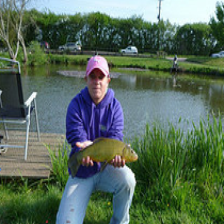

In [ ]:
show(best_adv[2])


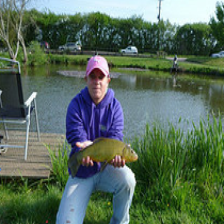

In [ ]:
show(img[2])

In [ ]:
model2=get_model(ModelOptions.VGG11)[0]

/storage/vaibhav/a3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/storage/vaibhav/a3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
if torch.cuda.is_available():
    model2.to(device)

In [ ]:
model.eval()
imag=img.to(device)
pred=model2(imag)

pred=torch.argmax(pred, dim=1)
print([idx2label[p] for p in pred])
print(pred.shape)

['tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'gar', 'tench', 'tench', 'tench', 'dugong', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'barracouta', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'barracouta', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'swimming_trunks', 'tench', 'tench', 'tench', 'tench', 'tench']
torch.Size([100])


In [ ]:
pred=model2(best_adv)

pred=torch.argmax(pred, dim=1)
print([idx2label[p] for p in pred.cpu().numpy()])
print(pred.shape)

['barracouta', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'gar', 'tench', 'tench', 'tench', 'dugong', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'barracouta', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'barracouta', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'axolotl', 'tench', 'tench', 'tench', 'tench', 'tench', 'barracouta', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'tench', 'coho', 'barracouta', 'tench', 'tench', 'tench', 'tench']
torch.Size([100])
